USing KMeans Algorithm for predicting best streaming service

In [137]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

In [138]:
data=pd.read_csv("/content/Best Streaming Service.csv")

In [139]:
data.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5368 entries, 0 to 5367
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5368 non-null   int64 
 1   ID               5368 non-null   int64 
 2   Title            5368 non-null   object
 3   Year             5368 non-null   int64 
 4   Age              3241 non-null   object
 5   IMDb             4406 non-null   object
 6   Rotten Tomatoes  5368 non-null   object
 7   Netflix          5368 non-null   int64 
 8   Hulu             5368 non-null   int64 
 9   Prime Video      5368 non-null   int64 
 10  Disney+          5368 non-null   int64 
 11  Type             5368 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 503.4+ KB


DATA CLEANSING : 

In [141]:
df=data.dropna()

In [142]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip("/100").replace("","100").astype("float")
# rstrip removes characters at end of obj

<ipython-input-142-1a545cb01b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip("/100").replace("","100").astype("float")


In [143]:
df['IMDb'] = df['IMDb'].str.rstrip("/10").replace("","10").astype("float")

<ipython-input-143-1773c1ac7be0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IMDb'] = df['IMDb'].str.rstrip("/10").replace("","10").astype("float")


In [144]:
df["Age"] = df["Age"].replace("+","")

df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
# coerce will replace all non-numeric values with NaN

<ipython-input-144-6b416a32ab15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].replace("+","")
<ipython-input-144-6b416a32ab15>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'],errors='coerce')


In [145]:
df.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,NaN,9.4,100.0,1,0,0,0,1
1,1,2,Stranger Things,2016,NaN,8.7,96.0,1,0,0,0,1
2,2,3,Attack on Titan,2013,NaN,9.0,95.0,1,1,0,0,1
3,3,4,Better Call Saul,2015,NaN,8.8,94.0,1,0,0,0,1
4,4,5,Dark,2017,NaN,8.8,93.0,1,0,0,0,1


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3207 entries, 0 to 5342
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3207 non-null   int64  
 1   ID               3207 non-null   int64  
 2   Title            3207 non-null   object 
 3   Year             3207 non-null   int64  
 4   Age              0 non-null      float64
 5   IMDb             3207 non-null   float64
 6   Rotten Tomatoes  3207 non-null   float64
 7   Netflix          3207 non-null   int64  
 8   Hulu             3207 non-null   int64  
 9   Prime Video      3207 non-null   int64  
 10  Disney+          3207 non-null   int64  
 11  Type             3207 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 325.7+ KB


In [147]:
df["Age"].value_counts()

Series([], Name: Age, dtype: int64)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


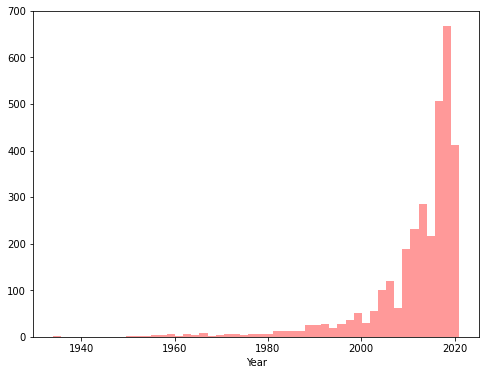

In [148]:
plt.subplots(figsize=(8,6))
sns.distplot(df["Year"],kde=False, color="red")

#  kernel density estimate (KDE) plot.  If False, suppress the legend for semantic variables.

In [149]:
print("IMDb ratings series  ")
print((df.sort_values("IMDb",ascending=False).head(20))['Title'])

IMDb ratings series  
5077                                         Bluey
3802             The Secret World of Nature: Spain
3611                                  Malgudi Days
0                                     Breaking Bad
2009                                        Cosmos
80                                      Our Planet
5                       Avatar: The Last Airbender
3503                               Clarkson's Farm
5106                       Cosmos: Possible Worlds
1950                                Rick and Morty
66                                      Death Note
331     Leah Remini: Scientology and the Aftermath
1959                                       Firefly
393                                    The Untamed
36                                  The Last Dance
2                                  Attack on Titan
25                Fullmetal Alchemist: Brotherhood
5244                  Critter Fixers: Country Vets
5079                        The Imagineering Story
1981     

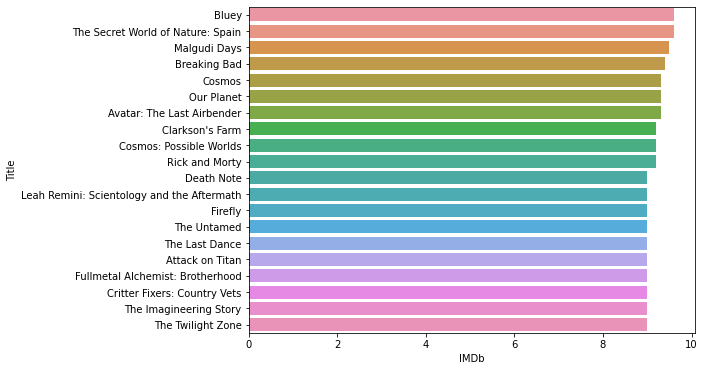

In [150]:
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= df.sort_values("IMDb",ascending=False).head(20))

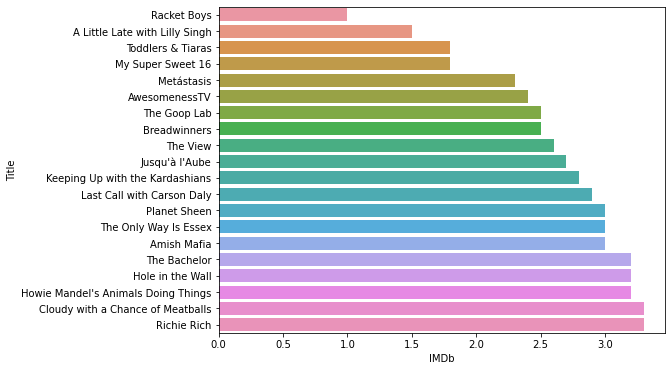

In [151]:
plt.subplots(figsize=(8,6))
sns.barplot(x="IMDb", y="Title" , data= df.sort_values("IMDb",ascending=True).head(20))

Text(0.5, 1.0, 'IMDb Rating')

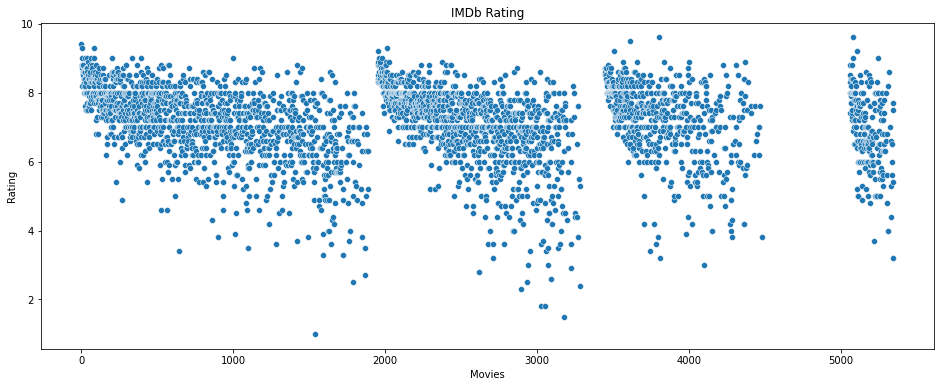

In [152]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df['IMDb'])
plt.ylabel("Rating")
plt.xlabel('Movies')
plt.title("IMDb Rating")

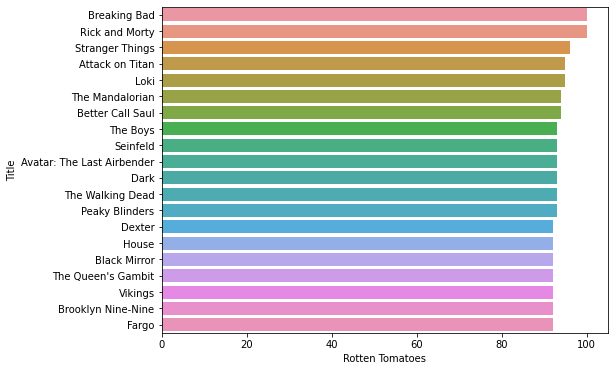

In [153]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= df.sort_values("Rotten Tomatoes",ascending=False).head(20))

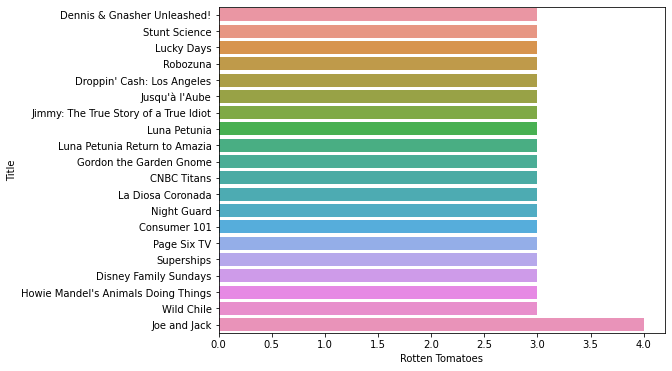

In [154]:
plt.subplots(figsize=(8,6))
sns.barplot(x="Rotten Tomatoes", y="Title" , data= df.sort_values("Rotten Tomatoes",ascending=True).head(20))

In [155]:
ratings=df[["Title",'IMDb',"Rotten Tomatoes"]]
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.4,100.0
1,Stranger Things,8.7,96.0
2,Attack on Titan,9.0,95.0
3,Better Call Saul,8.8,94.0
4,Dark,8.8,93.0


In [156]:
ratings=ratings.dropna()
ratings["IMDb"]=ratings["IMDb"]*10
ratings.head()

,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,94.0,100.0
1,Stranger Things,87.0,96.0
2,Attack on Titan,90.0,95.0
3,Better Call Saul,88.0,94.0
4,Dark,88.0,93.0


In [157]:
X=ratings[["IMDb","Rotten Tomatoes"]]

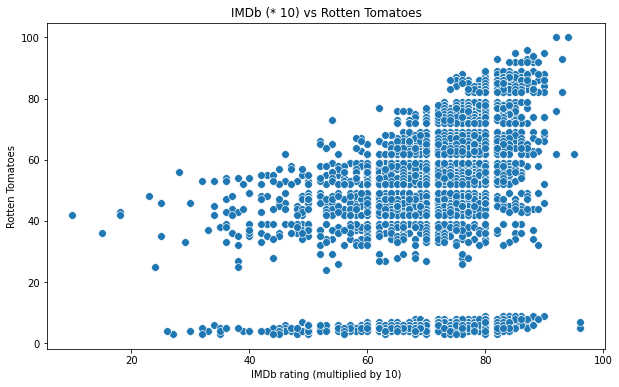

In [158]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',  data = X  ,s = 60 )
plt.xlabel('IMDb rating (multiplied by 10)')
plt.ylabel('Rotten Tomatoes') 
plt.title('IMDb (* 10) vs Rotten Tomatoes')
plt.show()

In [159]:
from sklearn.cluster import KMeans

In [160]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

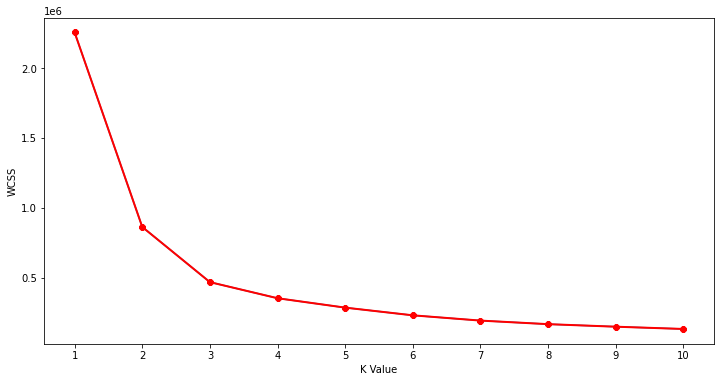

In [161]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [162]:
#Taking 4 clusters
km=KMeans(n_clusters=4)

In [163]:
#Fitting the input data
km.fit(X)

KMeans(n_clusters=4)

In [164]:
#predicting the labels of the input data
y=km.predict(X)

In [165]:
#adding the labels to a column named label
ratings["label"] = y

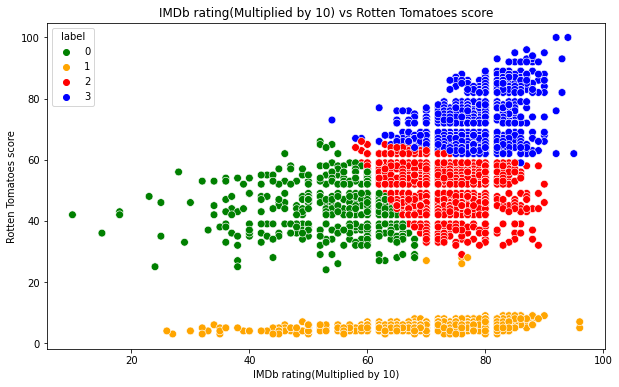

In [166]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",  
                 palette=['green','orange','red',"blue"], legend='full',data = ratings  ,s = 60 )
plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score') 
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')
plt.show()

In [167]:
df["Netflix"].value_counts()

0    1878
1    1329
Name: Netflix, dtype: int64

In [168]:
df["Hulu"].value_counts()

0    1995
1    1212
Name: Hulu, dtype: int64

In [169]:
df["Prime Video"].value_counts()

0    2457
1     750
Name: Prime Video, dtype: int64

In [170]:
df["Disney+"].value_counts()

0    2950
1     257
Name: Disney+, dtype: int64

In [171]:
df[df["Netflix"]==1]['IMDb'].mean()

7.145748683220467

In [172]:
df[df["Hulu"]==1]['IMDb'].mean()

7.119471947194719

In [173]:
df[df["Prime Video"]==1]['IMDb'].mean()

7.258

In [174]:
df[df["Disney+"]==1]['IMDb'].mean()

6.907003891050583

**RESULT :**

1. We can see here that Netflix has the biggest collection library among other streaming platforms, hence **Netflix** is best for the user searching for vast libraries of movies and series.

2. Also it is visible that avg IMDb ratings of all platforms are approx same. i.e, in range of 6.9 - 7.3, still by comparison **Prime Video** is the best platform here in terms of 'high quality content,